# Análisis del entrenamiento

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

## train

In [ ]:
from src.training import *

train_model()

2.6.0
2.6.0
2.6.0
################################################################################
Epoch: 0001/0100
batch: 192: 100%|██████████| 192/192 [00:16<00:00, 11.33it/s]
training set errors:	classification error: 0.814968	autoencoder error: 0.044856	error_1: 3.563832	error_2: 4.705664	total error: 24.613707	accuracy: 0.485167
training takes 16.95 seconds.
batch: 048: 100%|██████████| 48/48 [00:01<00:00, 27.03it/s]
validation set errors:	classification error: 0.650433	autoencoder error: 0.053476	error_1: 3.996709	error_2: 5.234918	total error: 22.293760	accuracy: 0.872667
################################################################################
Epoch: 0002/0100
batch: 021:  11%|█         | 21/192 [00:02<00:15, 11.12it/s]

## Prototipos aprendidos

In [1]:
prototype_distances = model.prototype_layer.prototype_distances
# decode prototype vectors
prototype_imgs = model.decoder(prototype_distances.reshape((-1,10,2,2))).detach().cpu()
# visualize the prototype images
n_cols = 5
n_rows = n_prototypes // n_cols + 1 if n_prototypes % n_cols != 0 else n_prototypes // n_cols
g, b = plt.subplots(n_rows, n_cols, figsize=(n_cols, n_rows))
for i in range(n_rows):
    for j in range(n_cols):
        if i*n_cols + j < n_prototypes:
            b[i][j].imshow(prototype_imgs[i*n_cols + j].reshape(input_height, input_width),
                                    cmap='gray',
                                    interpolation='none')
            b[i][j].axis('off')                   
#plt.savefig(os.path.join(img_folder, 'prototype_result-' + str(epoch+1) + '.png'),
#                    transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

plt.close()

NameError: name 'model' is not defined

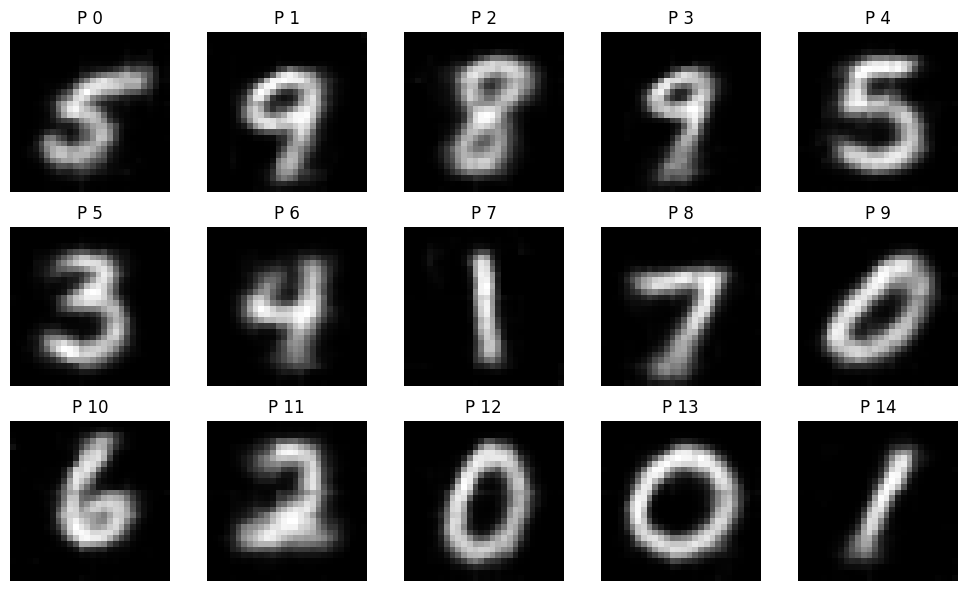

In [220]:
import matplotlib.pyplot as plt
import torch

# Asegurar que los prototipos están en CPU y convertir a numpy
prototype_imgs_np = prototype_imgs.squeeze().detach().cpu().numpy()

# Parámetros de la cuadrícula
n_prototypes = prototype_imgs_np.shape[0]
n_cols = 5
n_rows = (n_prototypes // n_cols) + (1 if n_prototypes % n_cols != 0 else 0)

# Crear figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))

for i, ax in enumerate(axes.flat):
    if i < n_prototypes:
        ax.imshow(prototype_imgs_np[i], cmap='gray', interpolation='none')
        ax.set_title(f"P {i}")  # Puedes cambiar el título si quieres agregar más info
        #ax.set_title(f"Clase {prototype_classes[i].item()}")

        ax.axis("off")

    else:
        ax.axis("off")  # Apagar ejes para celdas vacías

plt.tight_layout()
plt.show()


In [263]:
batch_x = []
for batch in train_loader:
    batch_x = batch[0].to(device)
    batch_y = batch[1].to(device)
    break

# Paso 1: Encontrar el índice de la imagen más cercana a cada prototipo
closest_train_example = prototype_distances.argmin(dim=1)  # Índice del ejemplo de entrenamiento más cercano

# Paso 2: Asignar la clase de ese ejemplo al prototipo
prototype_classes = batch_y[closest_train_example]  # Clases asociadas a cada prototipo

# Mostramos la asociación prototipo → clase
for i, cls in enumerate(prototype_classes):
    print(f"Prototipo {i} → Clase asignada: {cls.item()}")


Prototipo 0 → Clase asignada: 2
Prototipo 1 → Clase asignada: 4
Prototipo 2 → Clase asignada: 2
Prototipo 3 → Clase asignada: 8
Prototipo 4 → Clase asignada: 6
Prototipo 5 → Clase asignada: 0
Prototipo 6 → Clase asignada: 5
Prototipo 7 → Clase asignada: 2
Prototipo 8 → Clase asignada: 8
Prototipo 9 → Clase asignada: 0
Prototipo 10 → Clase asignada: 6
Prototipo 11 → Clase asignada: 9
Prototipo 12 → Clase asignada: 5
Prototipo 13 → Clase asignada: 9
Prototipo 14 → Clase asignada: 0


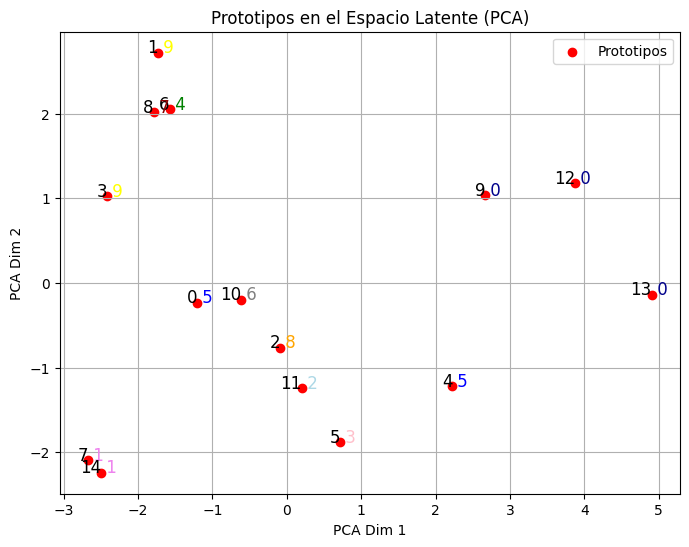

In [ ]:


n_prototypes = prototype_imgs.shape[0]
flattened_prototypes = prototype_imgs.view(n_prototypes, -1).numpy()  # (15, 784)

pca = PCA(n_components=2)
prototype_coords = pca.fit_transform(flattened_prototypes)  # (15, 2)

plt.figure(figsize=(8, 6))
plt.scatter(prototype_coords[:, 0], prototype_coords[:, 1], c="red", marker="o", label="Prototipos")

for i, (x, y) in enumerate(prototype_coords):
    plt.text(x, y, str(i), fontsize=12, ha='right', color="black")
    if i == 0 or i == 4:
        plt.text(x, y, " 5", fontsize=12, ha='left', color="blue")
    elif i == 1 or i ==3:
        plt.text(x, y, " 9", fontsize=12, ha='left', color="yellow")
    elif i == 2:
        plt.text(x, y, " 8", fontsize=12, ha='left', color="orange")
    elif i == 5:
        plt.text(x, y, " 3", fontsize=12, ha='left', color="pink")
    elif i == 6:
        plt.text(x, y, " 4", fontsize=12, ha='left', color="green")
    elif i == 7 or i == 14:
        plt.text(x, y, " 1", fontsize=12, ha='left', color="violet")
    elif i == 8:
        plt.text(x, y, " 7", fontsize=12, ha='left', color="darkred")
    elif i == 9 or i == 12 or i == 13:
        plt.text(x, y, " 0", fontsize=12, ha='left', color="darkblue")
    elif i == 10:
        plt.text(x, y, " 6", fontsize=12, ha='left', color="grey")
    elif i == 11:
        plt.text(x, y, " 2", fontsize=12, ha='left', color="lightblue")


plt.xlabel("PCA Dim 1")
plt.ylabel("PCA Dim 2")
plt.title("Prototipos en el Espacio Latente (PCA)")
plt.legend()
plt.grid(True)
plt.show()


In [273]:
import torch
from collections import defaultdict

# Función para encontrar la relación prototipo-clase
def analyze_prototype_class_relationship(model, data_loader, device, n_prototypes):
    model.eval()  # Modo evaluación
    prototype_class_counts = defaultdict(lambda: defaultdict(int))  # Diccionario para contar asociaciones
    
    with torch.no_grad():
        for batch_x, batch_y in data_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            
            # Obtener las distancias a los prototipos
            _ = model.forward(batch_x)  # Ejecutar forward para calcular feature_vectors y prototype_distances
            prototype_distances = model.prototype_layer.prototype_distances  # Forma: (batch_size, n_prototypes)
            
            # Encontrar el prototipo más cercano para cada imagen
            min_distances, closest_prototypes = torch.min(prototype_distances, dim=1)  # Índices de prototipos más cercanos
            
            # Asociar cada prototipo con su clase
            for i, closest_prototype in enumerate(closest_prototypes):
                class_label = batch_y[i].item()  # Etiqueta de la clase (0-9 para MNIST)
                prototype_class_counts[closest_prototype.item()][class_label] += 1
    
    # Determinar la clase dominante por prototipo
    prototype_to_class = {}
    for proto_idx in range(n_prototypes):
        class_counts = prototype_class_counts[proto_idx]
        if class_counts:
            dominant_class = max(class_counts, key=class_counts.get)  # Clase con más asociaciones
            total_counts = sum(class_counts.values())
            percentage = (class_counts[dominant_class] / total_counts) * 100
            prototype_to_class[proto_idx] = (dominant_class, percentage)
            print(f"Prototipo {proto_idx}: Clase dominante = {dominant_class}, "
                  f"Porcentaje = {percentage:.2f}% ({class_counts[dominant_class]}/{total_counts})")
        else:
            print(f"Prototipo {proto_idx}: No asignado (sin muestras cercanas)")
    
    return prototype_to_class

n_prototypes = 15 # Número de prototipos
prototype_class_map = analyze_prototype_class_relationship(model, val_loader, device, n_prototypes)


Prototipo 0: No asignado (sin muestras cercanas)
Prototipo 1: No asignado (sin muestras cercanas)
Prototipo 2: Clase dominante = 8, Porcentaje = 14.58% (7/48)
Prototipo 3: No asignado (sin muestras cercanas)
Prototipo 4: No asignado (sin muestras cercanas)
Prototipo 5: No asignado (sin muestras cercanas)
Prototipo 6: No asignado (sin muestras cercanas)
Prototipo 7: No asignado (sin muestras cercanas)
Prototipo 8: No asignado (sin muestras cercanas)
Prototipo 9: No asignado (sin muestras cercanas)
Prototipo 10: No asignado (sin muestras cercanas)
Prototipo 11: Clase dominante = 3, Porcentaje = 14.58% (7/48)
Prototipo 12: No asignado (sin muestras cercanas)
Prototipo 13: No asignado (sin muestras cercanas)
Prototipo 14: No asignado (sin muestras cercanas)


In [274]:
print("Forma de prototype_distances:", prototype_distances.shape)
print("Valores de muestra:", prototype_distances[:5, :5])

Forma de prototype_distances: torch.Size([15, 40])
Valores de muestra: tensor([[0.5692, 0.1749, 0.4174, 0.2123, 0.3568],
        [0.0838, 0.0278, 0.7519, 0.5202, 0.9357],
        [0.3041, 0.9718, 0.2802, 0.6326, 0.8590],
        [0.4692, 0.8859, 0.6787, 0.5036, 0.4340],
        [0.9809, 0.8057, 0.1102, 0.6215, 0.7723]])


### Imágenes reales y su reconstrucción

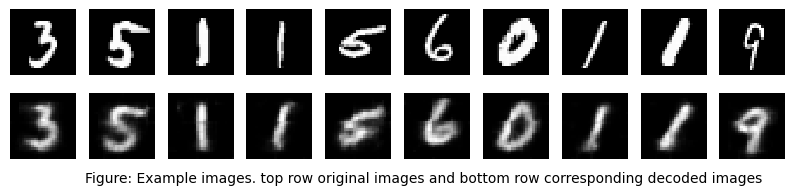

In [ ]:
# apply encoding and decoding over a small subset of the training set
batch_x = []
for batch in train_loader:
    batch_x = batch[0].to(device)
    break

examples_to_show = 10
        
encoded = model.encoder.forward(batch_x[:examples_to_show])
decoded = model.decoder.forward(encoded)

decoded = decoded.detach().cpu()
imgs = batch_x.detach().cpu()


# compare original images to their reconstructions
f, a = plt.subplots(2, examples_to_show, figsize=(examples_to_show, 2))
for i in range(examples_to_show):
    a[0][i].imshow(imgs[i].reshape(input_height, input_width),
                            cmap='gray',
                            interpolation='none')
    a[0][i].axis('off')
    a[1][i].imshow(decoded[i].reshape(input_height, input_width), 
                            cmap='gray',
                            interpolation='none')
    a[1][i].axis('off')

f.text(.2,.005,'Figure: Example images. top row original images and bottom row corresponding decoded images')
#plt.savefig(os.path.join(img_folder, 'decoding_result-' + str(epoch+1) + '.png'),
#                    transparent=True,
#                    bbox_inches='tight',
#                    pad_inches=0)
plt.show()
plt.close()

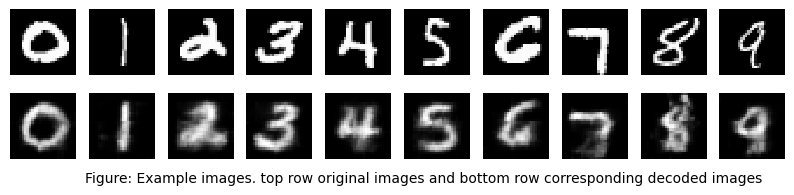

,0,1,2,3,4,5,6,7,8,9
0,9.250421,-8.417920,-12.369952,-15.844141,-4.071161,-7.150240,-7.561873,-7.027077,-6.628685,2.554151
1,-7.412405,8.801007,-5.682553,-5.645069,-2.828478,-4.986596,-4.978676,-4.940060,-5.836750,-4.956385
2,-4.590742,-3.400919,7.786682,-2.274517,-5.146058,-4.147929,-3.350879,-4.532129,-2.949173,-6.049932
3,-4.205976,-9.621295,-0.428727,13.335221,-20.293617,-0.973877,-12.669706,-3.597300,-2.616535,-3.604821
4,-6.536367,-5.576161,0.624176,-23.232498,14.601245,-10.647366,-2.435850,-0.125973,-2.326989,-4.315001
5,-5.125236,-17.008812,-7.437560,-1.202042,-9.518859,13.560757,0.641158,-6.985299,-1.559929,-1.179768
6,1.233078,-6.693475,-4.514202,-5.287523,-5.844714,5.389827,7.670581,-10.701344,-5.994045,-5.017019
7,-6.546714,-6.712568,-4.187099,-5.059425,-4.120713,-9.078803,-12.542021,9.016776,-7.947745,-1.986673
8,-17.322626,-6.473087,-9.409048,-15.751086,-2.210914,-2.240485,0.582817,-10.908834,8.215917,-2.205326
9,-2.876508,-13.422620,-3.938699,-9.155615,1.582376,-9.114603,-7.739001,-5.957807,-0.439157,8.089557


In [31]:
import pandas as pd
# apply encoding and decoding over a small subset of the training set
batch_x = []
for batch in train_loader:
    batch_x = batch[0].to(device)
    batch_y = batch[1].to(device)
    break
    
pred_y = model.forward(batch_x)

pred_y_np = pred_y.detach().cpu().numpy() 
batch_y_np = batch_y.detach().cpu().numpy()
labels = []
data = []
idx = []
i = 0
j = 0
for l in batch_y_np:
    if(i==10):
        break
    if l==i:
        labels.append(l)
        data.append(pred_y_np[j])
        idx.append(j)
        i = i+1
    j = j + 1
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
examples_to_show = 10
        
encoded = model.encoder.forward(batch_x)
decoded = model.decoder.forward(encoded)

decoded = decoded.detach().cpu()
imgs = batch_x.detach().cpu() 

# compare original images to their reconstructions
f, a = plt.subplots(2, examples_to_show, figsize=(examples_to_show, 2))
j = 0
for i in idx:
    a[0][j].imshow(imgs[i].reshape(input_height, input_width),
                            cmap='gray',
                            interpolation='none')
    a[0][j].axis('off')
    a[1][j].imshow(decoded[i].reshape(input_height, input_width), 
                            cmap='gray',
                            interpolation='none')
    a[1][j].axis('off')
    j = j + 1
            
#plt.savefig(os.path.join(img_folder, 'decoding_result-' + str(epoch+1) + '.png'),
#                    transparent=True,
#                    bbox_inches='tight',
#                    pad_inches=0)
f.text(.2,.005,'Figure: Example images. top row original images and bottom row corresponding decoded images')
plt.show()
plt.close()
    
df = pd.DataFrame(data, labels, classes)
df.style.format(precision=2)
df.style.highlight_max(props='background-color:red;color:white;', axis=1)




# Examples of test

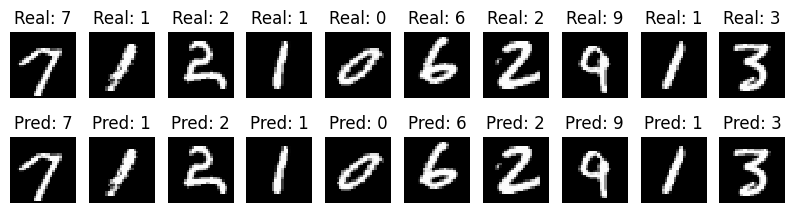

,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9
Example 0,0.000000,0.000001,0.000001,0.000000,0.000000,0.000000,0.000000,0.999993,0.000000,0.000004
Example 1,0.000002,0.972178,0.000003,0.001844,0.000237,0.000380,0.000009,0.000154,0.001806,0.023387
Example 2,0.000001,0.000000,0.998059,0.001910,0.000000,0.000004,0.000007,0.000001,0.000018,0.000000
Example 3,0.000000,0.999809,0.000000,0.000002,0.000098,0.000010,0.000014,0.000001,0.000041,0.000023
Example 4,0.999711,0.000000,0.000000,0.000000,0.000002,0.000002,0.000090,0.000000,0.000186,0.000009
Example 5,0.000000,0.000000,0.000156,0.000000,0.000000,0.000012,0.999832,0.000000,0.000000,0.000000
Example 6,0.000006,0.000000,0.999823,0.000138,0.000000,0.000002,0.000014,0.000001,0.000017,0.000000
Example 7,0.000001,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000,0.000006,0.999985
Example 8,0.000000,0.998937,0.000004,0.000010,0.000257,0.000011,0.000032,0.000009,0.000657,0.000083
Example 9,0.000000,0.000000,0.000000,0.999999,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000


In [ ]:
test_loader = get_test_loader(data_folder, batch_size, shuffle=True, num_workers=0, pin_memory=True)
batch_x, batch_y = next(iter(test_loader))
batch_x, batch_y = batch_x.to(device), batch_y.to(device)

with torch.no_grad():
    pred_y = model(batch_x) 

pred_y_np = pred_y.cpu().numpy()
batch_y_np = batch_y.cpu().numpy()

probabilities = torch.nn.functional.softmax(pred_y, dim=1).cpu().numpy()

examples_to_show = 10
fig, axes = plt.subplots(2, examples_to_show, figsize=(examples_to_show, 2.5))

for i in range(examples_to_show):
    # imagen original
    axes[0, i].imshow(batch_x[i].cpu().squeeze(), cmap="gray", interpolation="none")
    axes[0, i].axis("off")
    axes[0, i].set_title(f"Real: {batch_y_np[i]}")
    
    # clase predicha
    predicted_class = pred_y_np[i].argmax()
    axes[1, i].imshow(batch_x[i].cpu().squeeze(), cmap="gray", interpolation="none")
    axes[1, i].axis("off")
    axes[1, i].set_title(f" \nPred: {predicted_class}")

plt.show()

df = pd.DataFrame(probabilities[:examples_to_show], 
                  index=[f"Example {i}" for i in range(examples_to_show)], 
                  columns=[f"Class {i}" for i in range(probabilities.shape[1])])

df = df.style.highlight_max(axis=1, props="background-color: red; color: white;")
df

#with torch.no_grad():
#    pred_y = model(batch_x)
#    prototype_distances = model.prototype_layer.prototype_distances
#    print("Distancias a prototipos (primeras 5 imágenes):", prototype_distances[:5])


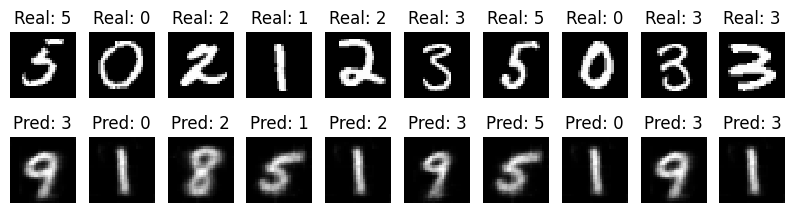

,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Class 8,Class 9
Example 0,0.000013,0.000000,0.000016,0.882286,0.000000,0.117655,0.000001,0.000000,0.000007,0.000022
Example 1,0.999653,0.000000,0.000000,0.000000,0.000000,0.000002,0.000001,0.000000,0.000004,0.000340
Example 2,0.000000,0.000000,0.999806,0.000186,0.000000,0.000001,0.000001,0.000004,0.000001,0.000000
Example 3,0.000000,0.999994,0.000005,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Example 4,0.000000,0.000000,0.999989,0.000009,0.000000,0.000001,0.000001,0.000001,0.000000,0.000000
Example 5,0.000000,0.000000,0.000000,0.999978,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000
Example 6,0.000000,0.000000,0.000000,0.000011,0.000000,0.999983,0.000004,0.000000,0.000001,0.000001
Example 7,0.999900,0.000000,0.000000,0.000000,0.000000,0.000006,0.000013,0.000079,0.000000,0.000001
Example 8,0.000000,0.000000,0.000002,0.999969,0.000000,0.000029,0.000000,0.000000,0.000000,0.000000
Example 9,0.000000,0.000000,0.000503,0.998864,0.000000,0.000583,0.000000,0.000045,0.000001,0.000003


In [ ]:
# Obtener un batch de test
test_loader = get_test_loader(data_folder, batch_size, shuffle=True, num_workers=0, pin_memory=True)

# Obtener un batch del conjunto de test
batch_x, batch_y = next(iter(test_loader))
batch_x, batch_y = batch_x.to(device), batch_y.to(device)

# Hacer predicciones
with torch.no_grad():
    pred_y = model(batch_x)  # No usar forward() directamente

# Convertir a numpy para análisis
pred_y_np = pred_y.cpu().numpy()
batch_y_np = batch_y.cpu().numpy()

# Obtener probabilidades con softmax
probabilities = torch.nn.functional.softmax(pred_y, dim=1).cpu().numpy()

# Seleccionar ejemplos a mostrar
examples_to_show = 10
fig, axes = plt.subplots(2, examples_to_show, figsize=(examples_to_show, 2.5))

for i in range(examples_to_show):
    # Mostrar imagen original en la primera fila
    axes[0, i].imshow(batch_x[i].cpu().squeeze(), cmap="gray", interpolation="none")
    axes[0, i].axis("off")
    axes[0, i].set_title(f"Real: {batch_y_np[i]}")
    
    # Obtener la clase predicha
    predicted_class = pred_y_np[i].argmax()

    
    closest_train_example = prototype_distances.argmin(dim=1)  # Índice del ejemplo de entrenamiento más cercano

    # Paso 2: Asignar la clase de ese ejemplo al prototipo
    prototype_classes = batch_y[closest_train_example]

    # Obtener el prototipo más cercano a la clase predicha
    prototype_image = prototype_imgs[prototype_classes].cpu().squeeze()



    # Mostrar el prototipo en la segunda fila
    axes[1, i].imshow(prototype_image[i], cmap="gray", interpolation="none")
    axes[1, i].axis("off")
    axes[1, i].set_title(f"Pred: {predicted_class}")

plt.show()

# Crear un DataFrame con probabilidades
df = pd.DataFrame(probabilities[:examples_to_show], 
                  index=[f"Example {i}" for i in range(examples_to_show)], 
                  columns=[f"Class {i}" for i in range(probabilities.shape[1])])

# Resaltar las predicciones más altas
df = df.style.highlight_max(axis=1, props="background-color: red; color: white;")
df
